<img src="./img/negritude.PNG">

As part of the 2020 Black History Month celebrations, The Negritude (Black Poets) Project seeks to perform NLP on poetry from 33 extraordinary Black Poets including:
    - Maya Angelou
    - Langston Hughes
    - Gwendolyn Brooks 
    - Amiri Baraka
    - etc.

This project provides:

- A dataset of the Poets's works on poetryfoundation.org.
- Topic Modelling on the data
- Sentiment Analysis of the data
- Clustering and classification of the data




In [58]:
# import necessary packages
import pandas as pd
import plotly
import plotly.express as px
from textblob import TextBlob

plotly.offline.init_notebook_mode(connected=True)

In [59]:
df = pd.read_csv("./data/black_poets.csv")

In [60]:
df.head()

,Poet,Title,Poem
0,LANGSTON HUGHES,50-50,"I’m all alone in this world, she said,\nAin’t ..."
1,LANGSTON HUGHES,Boogie: 1 A.M.,"Good evening, daddy!\nI know you’ve heard\nThe..."
2,LANGSTON HUGHES,Black Maria,"Must be the black Maria\nThat I see,\nThe blac..."
3,LANGSTON HUGHES,BLUES IN STEREO \n,YOUR NUMBER'S COMING OUT! BOUQUETS I'LL SEND Y...
4,LANGSTON HUGHES,Brass Spittoons,"Clean the spittoons, boy.\n Detroit,\n ..."


In [61]:
df.groupby('Poet')['Poem'].count()

Poet
 JAYNE CORTEZ                 7
ALICE MOORE DUNBAR-NELSON     8
AMIRI BARAKA                  7
ANNE SPENCER                  4
ARNA BONTEMPS                 1
AUDRE LORDE                  13
CLAUDE MCKAY                 13
COUNTEE CULLEN                1
DUDLEY RANDALL                2
ETHERIDGE KNIGHT\n           14
GEORGE MOSES HORTON           8
GWENDOLYN BROOKS             28
HAKI R. MADHUBUTI             4
HENRY DUMAS                   8
JAMES BALDWIN                 5
JAMES WELDON JOHNSON\n        7
JEAN TOOMER                  12
JUNE JORDAN\n                14
JUPITER HAMMON                4
LANGSTON HUGHES              31
LUCILLE CLIFTON              26
MARGARET WALKER               5
MAYA ANGELOU                 11
MELVIN B. TOLSON             12
MICHAEL S. HARPER            14
NIKKI GIOVANNI               15
NTOZAKE SHANGE               10
PAUL LAURENCE DUNBAR         17
PHILLIS WHEATLEY              7
QUINCY TROUPE                 1
ROBERT HAYDEN                 7
TER

In [62]:
df2 = df.groupby('Poet').count()
fig = px.bar(df2, x=df2.index, y="Title", labels={'x':'Poet', 'Title':'Number of Poems'})

fig.show()

In [63]:
df['Poem'] = df['Poem'].astype(str)

df['Sentiment Analysis'] = df['Poem'].apply(lambda tweet: 'positive' if TextBlob(tweet).sentiment.polarity > 0  else ('neutral' if TextBlob(tweet).sentiment.polarity == 0 else 'negative'))

In [53]:
df.head()

,Poet,Title,Poem,Sentiment Analysis
0,LANGSTON HUGHES,50-50,"I’m all alone in this world, she said,\nAin’t ...",negative
1,LANGSTON HUGHES,Boogie: 1 A.M.,"Good evening, daddy!\nI know you’ve heard\nThe...",positive
2,LANGSTON HUGHES,Black Maria,"Must be the black Maria\nThat I see,\nThe blac...",positive
3,LANGSTON HUGHES,BLUES IN STEREO \n,YOUR NUMBER'S COMING OUT! BOUQUETS I'LL SEND Y...,positive
4,LANGSTON HUGHES,Brass Spittoons,"Clean the spittoons, boy.\n Detroit,\n ...",positive


In [74]:
df3 = df.groupby(['Poet', 'Sentiment Analysis'])['Poem'].count()

In [75]:
df3.head()

Poet                       Sentiment Analysis
 JAYNE CORTEZ              negative              5
                           positive              2
ALICE MOORE DUNBAR-NELSON  negative              2
                           positive              6
AMIRI BARAKA               negative              4
Name: Poem, dtype: int64

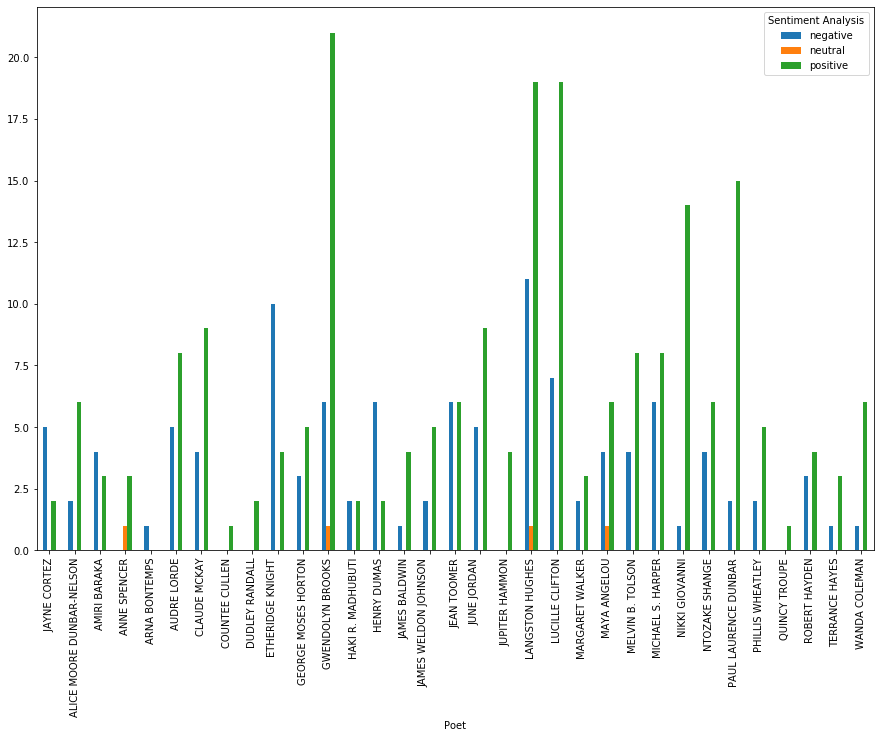

In [76]:
df3.unstack().plot(kind='bar',figsize = (15, 10))

In [78]:
df4 = df.groupby('Sentiment Analysis').count()

In [80]:
df4

,Poet,Title,Poem
Sentiment Analysis,,,
negative,110,110,110
neutral,4,4,4
positive,213,213,213
